# Proyek Analisis Data:  Bike Sharing Dataset
- **Nama:** Tito Trinidad Situmorang
- **Email:** titostmrg@gmail.com
- **ID Dicoding:** titostmrg

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Apa perbedaan pola penggunaan sepeda antara pengguna casual dan pengguna terdaftar?
- Pertanyaan 2 : Bagaimana tren penggunaan sepeda sewaan dari waktu ke waktu?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [4]:
hari_df = pd.read_csv("./data/day.csv")
hari_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [5]:
waktu_df = pd.read_csv("./data/hour.csv")
waktu_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [6]:
hari_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [7]:
waktu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [8]:
print("Jumlah duplikasi: ", hari_df.duplicated().sum())

Jumlah duplikasi:  0


In [9]:
print("Jumlah duplikasi: ", waktu_df.duplicated().sum())

Jumlah duplikasi:  0


In [10]:
hari_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [11]:
waktu_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


## Exploratory Data Analysis (EDA)

### Explore day.csv

In [12]:
hari_df.sample(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
221,222,2011-08-10,3,0,8,0,3,1,1,0.766667,0.684983,0.424167,0.200258,884,3896,4780
679,680,2012-11-10,4,1,11,0,6,0,1,0.389167,0.393937,0.645417,0.057846,2090,4446,6536
253,254,2011-09-11,3,0,9,0,0,0,1,0.653333,0.609229,0.713750,0.115054,1633,3413,5046
599,600,2012-08-22,3,1,8,0,3,1,1,0.667500,0.621854,0.677083,0.070283,1094,6281,7375
326,327,2011-11-23,4,0,11,0,3,1,2,0.440833,0.430537,0.757917,0.335825,112,2454,2566
721,722,2012-12-22,1,1,12,0,6,0,1,0.265833,0.236113,0.441250,0.407346,205,1544,1749
260,261,2011-09-18,3,0,9,0,0,0,1,0.507500,0.490537,0.695000,0.178483,1353,2921,4274
497,498,2012-05-12,2,1,5,0,6,0,1,0.564167,0.544817,0.480417,0.123133,2622,4807,7429
231,232,2011-08-20,3,0,8,0,6,0,1,0.697500,0.648996,0.674167,0.104467,1914,3277,5191
279,280,2011-10-07,4,0,10,0,5,1,1,0.510833,0.504404,0.684167,0.022392,949,4036,4985


In [13]:
hari_df.instant.is_unique

True

Hasil pengecekan value "instant" adalah True yang berarti memiliki value yang berbeda dan tidak terduplikasi, hal ini memvalidasi bahwasannya tidak data yang duplikasi sesuai dengan tahap assesing data

In [14]:
hari_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-09-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


Dari hasil tersebut kita dapat melihat bahwa rata-rata sepeda sewaan adalah 4504, dengan nilai penyewaan maksimun 8714 serta nilai minimum 22

Kemudian untuk pengguna casual memiliki rata-rata 848 sepeda sewaan dengan nilai minimum penyewaan sepeda 2 serta maximal ada 3410

Untuk pengguna terdaftar memilki rata-rata 3656 sepeda sewaan dengan nilai minimum 20 sepeda serta nilai maksimal 6946

In [15]:
hari_df.groupby(by="casual").agg({
    "casual": "nunique",
    "weekday": ["max", "min", "mean", ]
})

casual weekday         
       nunique     max min mean
casual                         
2            1       1   1  1.0
9            1       3   2  2.5
15           1       4   4  4.0
25           1       3   3  3.0
34           1       3   3  3.0
...        ...     ...  ..  ...
3155         1       6   6  6.0
3160         1       6   6  6.0
3252         1       6   6  6.0
3283         1       0   0  0.0
3410         1       6   6  6.0

[606 rows x 4 columns]

In [16]:
hari_df.groupby(by="registered").agg({
    "registered": "nunique",
    "weekday": ["max", "min", "mean", ]
})

registered weekday         
              nunique     max min mean
registered                            
20                  1       1   1  1.0
416                 1       4   4  4.0
432                 1       3   3  3.0
451                 1       0   0  0.0
472                 1       3   3  3.0
...               ...     ...  ..  ...
6844                1       3   3  3.0
6898                1       3   3  3.0
6911                1       3   3  3.0
6917                1       5   5  5.0
6946                1       3   3  3.0

[679 rows x 4 columns]

Dari kedua hasil diatas ternyata rata-rata pengunaan sepeda sewaaan pada hari biasa atau weekdays pengguna biasa ternyata value nya lebih tinggi dibandingkan pengguna yang terdaftar

Hal ini menunjukkan bahwa pengguna biasa ternyata lebih dominan menggunkan sepeda sewaan dibandingkan pengguna terdaftar

In [17]:
hari_df.groupby(by="casual").agg({
    "casual": "nunique",
    "holiday": ["max", "min", "mean", ]
})

casual holiday         
       nunique     max min mean
casual                         
2            1       0   0  0.0
9            1       0   0  0.0
15           1       0   0  0.0
25           1       0   0  0.0
34           1       0   0  0.0
...        ...     ...  ..  ...
3155         1       0   0  0.0
3160         1       0   0  0.0
3252         1       0   0  0.0
3283         1       0   0  0.0
3410         1       0   0  0.0

[606 rows x 4 columns]

In [18]:
hari_df.groupby(by="registered").agg({
    "registered": "nunique",
    "holiday": ["max", "min", "mean", ]
})

registered holiday         
              nunique     max min mean
registered                            
20                  1       0   0  0.0
416                 1       0   0  0.0
432                 1       0   0  0.0
451                 1       0   0  0.0
472                 1       0   0  0.0
...               ...     ...  ..  ...
6844                1       0   0  0.0
6898                1       0   0  0.0
6911                1       0   0  0.0
6917                1       0   0  0.0
6946                1       0   0  0.0

[679 rows x 4 columns]

Dari kedua hasil diatas dapat dilihat ternyata pengguna biasa dengan pengguna terdaftar tidakk menggunakan sepeda sewaan pada hari libur

##Menggabungkan semua data

In [19]:
all_df = pd.merge(
    left = hari_df,
    right = waktu_df,
    how = "left",
    left_on = "instant",
    right_on = "instant"
)
all_df.head()

,instant,dteday_x,season_x,yr_x,mnth_x,holiday_x,weekday_x,workingday_x,weathersit_x,temp_x,...,weekday_y,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,...,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,...,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,...,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,...,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [20]:
all_df.groupby(by=["weekday_x", "holiday_x"]).agg({
    "casual_y": "sum",
    "registered_y": "sum"
})


casual_y  registered_y
weekday_x holiday_x                        
0         0               469          5588
1         0               355          4692
          1               124          1075
2         0               442          5361
          1                 1            74
3         0               420          5070
          1                 0             2
4         0               431          5364
          1                 1             9
5         0               459          4911
          1                11           124
6         0               466          5416

In [21]:
all_df.to_csv("all_data.csv", index=False)

## Visualization & Explanatory Analysis

In [22]:
all_df.sample(5)

,instant,dteday_x,season_x,yr_x,mnth_x,holiday_x,weekday_x,workingday_x,weathersit_x,temp_x,...,weekday_y,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y
660,661,2012-10-22,4,1,10,0,1,1,1,0.487500,...,0,0,2,0.26,0.2727,0.65,0.1045,3,30,33
271,272,2011-09-29,4,0,9,0,4,1,1,0.616667,...,3,1,1,0.20,0.1515,0.47,0.5224,2,135,137
395,396,2012-01-31,1,1,1,0,2,1,1,0.390000,...,1,0,3,0.16,0.1364,0.86,0.2836,1,3,4
516,517,2012-05-31,2,1,5,0,4,1,1,0.680000,...,0,0,1,0.16,0.1364,0.28,0.3582,13,64,77
522,523,2012-06-06,2,1,6,0,3,1,1,0.554167,...,0,0,1,0.10,0.1061,0.36,0.1940,5,20,25


### Pertanyaan 1:  Bagaimana pola penggunaan sepeda berubah selama hari libur dibandingkan dengan hari biasa?

In [23]:
holiday_df = all_df[all_df['holiday_x'] == 1]
non_holiday_df = all_df[all_df['holiday_x'] == 0]

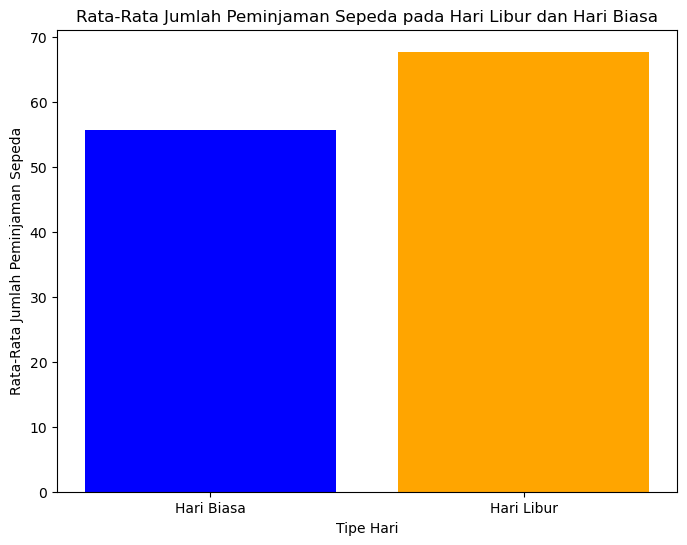

In [24]:
avg_holiday = holiday_df['cnt_y'].mean()
avg_non_holiday = non_holiday_df['cnt_y'].mean()

plt.figure(figsize=(8, 6))
plt.bar(['Hari Biasa', 'Hari Libur'], [avg_non_holiday, avg_holiday], color=['blue', 'orange'])

plt.title('Rata-Rata Jumlah Peminjaman Sepeda pada Hari Libur dan Hari Biasa')
plt.xlabel('Tipe Hari')
plt.ylabel('Rata-Rata Jumlah Peminjaman Sepeda')

plt.show()

Grafik ini akan menunjukkan perbandingan rata-rata jumlah peminjaman sepeda pada hari libur dan hari biasa. Jika rata-rata jumlah peminjaman sepeda pada hari libur lebih tinggi dari hari biasa, maka dapat disimpulkan bahwa pola penggunaan sepeda berubah selama hari libur dibandingkan dengan hari biasa.

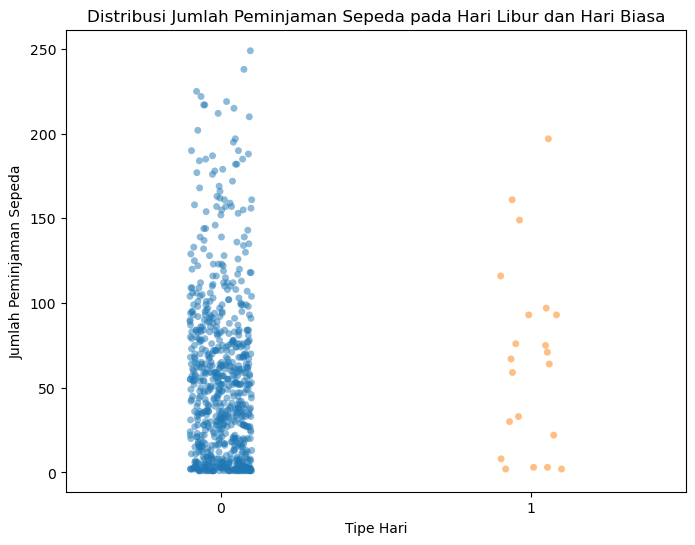

In [25]:
plt.figure(figsize=(8, 6))
sns.stripplot(x='holiday_x', y='cnt_y', data=all_df, jitter=True, alpha=0.5)

plt.title('Distribusi Jumlah Peminjaman Sepeda pada Hari Libur dan Hari Biasa')
plt.xlabel('Tipe Hari')
plt.ylabel('Jumlah Peminjaman Sepeda')

plt.show()

Titik-titik yang tersebar menunjukkan jumlah peminjaman sepeda pada setiap hari, dan jittering digunakan untuk menghindari tumpang tindih titik-titik dengan nilai yang sama.

### Pertanyaan 2: Bagaimana tren penggunaan sepeda sewaan dari waktu ke waktu?

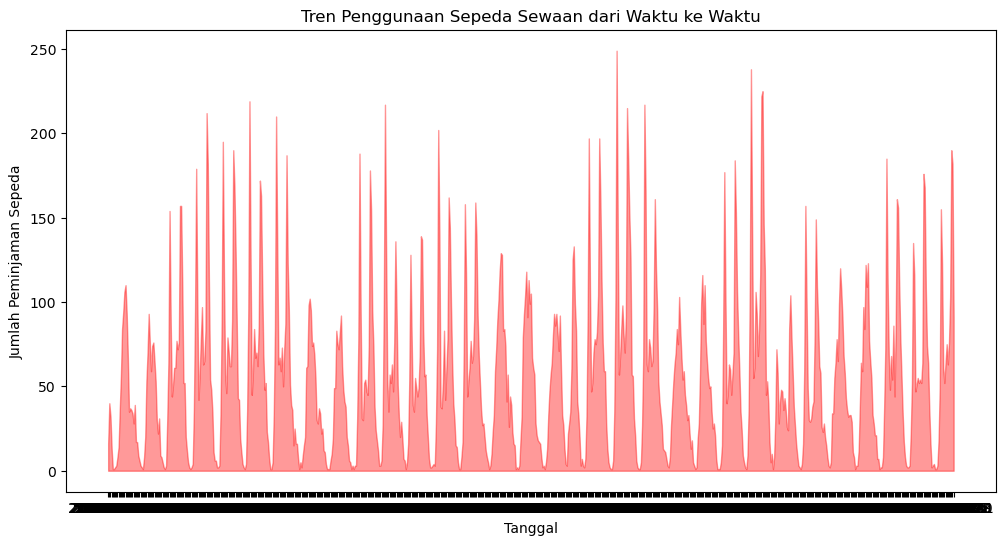

In [26]:
plt.figure(figsize=(12, 6))
plt.fill_between(all_df['dteday_x'], all_df['cnt_y'], color='red', alpha=0.4)

plt.title('Tren Penggunaan Sepeda Sewaan dari Waktu ke Waktu')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Peminjaman Sepeda')

plt.show()

Berdasarkan grafik diatas, tren penggunaan sepeda dari waktu ke waktu menggunakan pola musiman,  di mana penggunaan sepeda sewaan cenderung naik atau turun pada waktu-waktu tertentu.

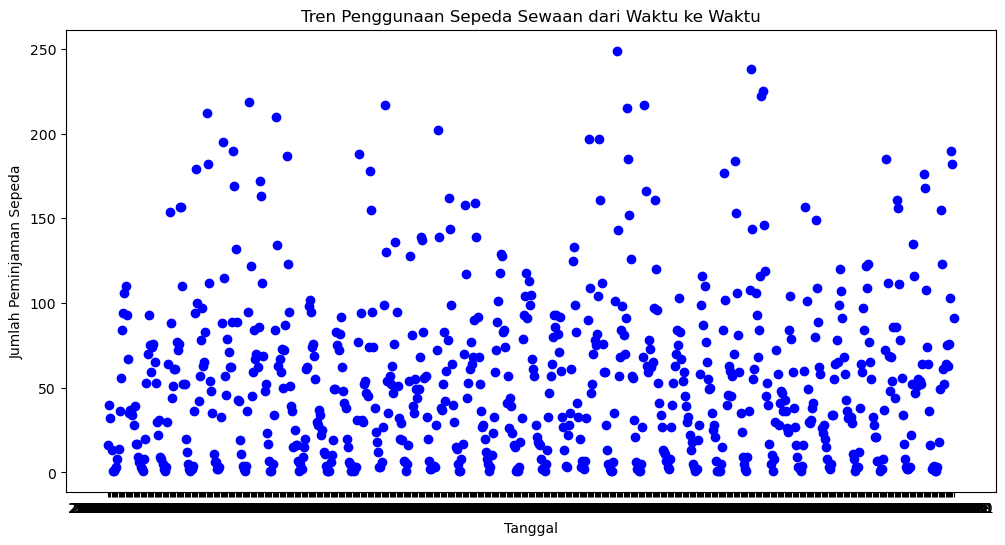

In [27]:
plt.figure(figsize=(12, 6))
plt.scatter(all_df['dteday_x'], all_df['cnt_y'], color='blue')

plt.title('Tren Penggunaan Sepeda Sewaan dari Waktu ke Waktu')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Peminjaman Sepeda')

plt.show()

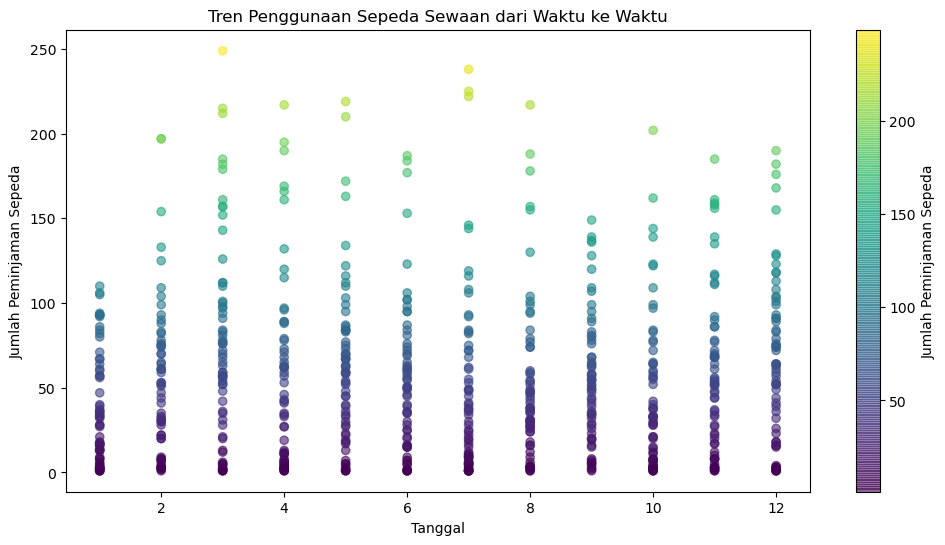

In [28]:
plt.figure(figsize=(12, 6))
plt.scatter(all_df['mnth_x'], all_df['cnt_y'], c=all_df['cnt_y'], cmap='viridis', alpha=0.6)

plt.colorbar(label='Jumlah Peminjaman Sepeda')

plt.title('Tren Penggunaan Sepeda Sewaan dari Waktu ke Waktu')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Peminjaman Sepeda')

plt.show()

Dalam scatter plot ini, setiap titik akan diwarnai berdasarkan nilai jumlah peminjaman sepeda pada titik tersebut. Penggunaan warna dapat memberikan dimensi tambahan pada visualisasi, yang memungkinkan Anda untuk memahami tren dan pola dengan lebih baik. Semakin terang warna, semakin tinggi jumlah peminjaman sepeda.

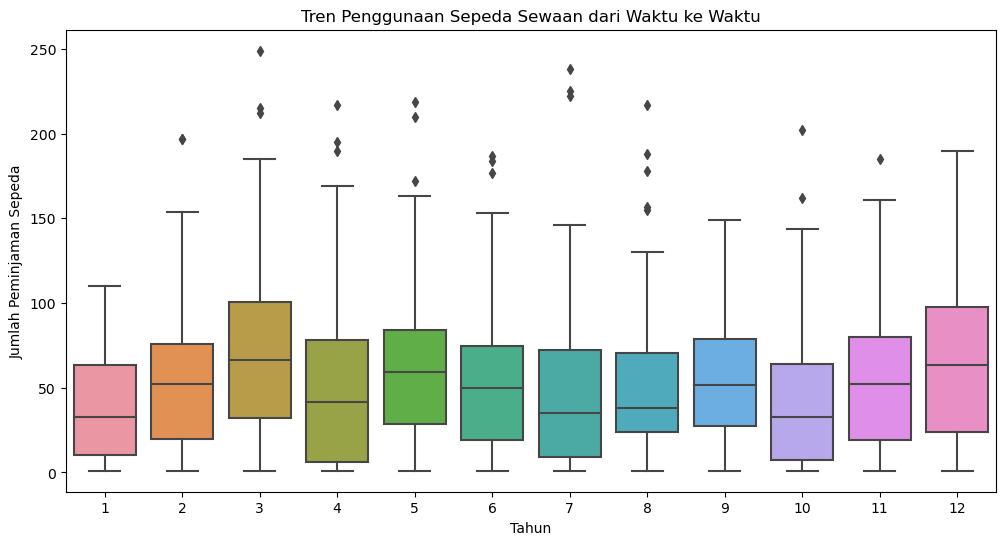

In [30]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=all_df, x='mnth_x', y='cnt_y')

plt.title('Tren Penggunaan Sepeda Sewaan dari Waktu ke Waktu')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Peminjaman Sepeda')

plt.show()

## Conclusion

- Conclution pertanyaan 1
Ternyata pada hari libur lebih sedikit orang untuk menyewa sepeda dibandingkan hari yang tidak libur.
- Conclution pertanyaan 2
Ternyata tren penggunaan sepeda itu fluktuatif dan tidak pernah dominan naik maupun dominan turun.